# Google Job Listings Data Scraper

This project provides a Python-based scraper designed to extract and analyze job listings from the [Google](www.google.com/about/careers/applications/jobs) careers website. By automating data collection, this scraper facilitates efficient analysis and visualization of job details, including job titles, companies, locations, and levels. By using libraries like `selenium`, `beautifulsoup4`, and `pandas`, the scraper retrieves, processes, and transforms the data into a structured format for further insights.

## Data Extraction
The scraper uses Selenium and BeautifulSoup to handle dynamic content and extract detailed job information from multiple pages. It automate browser actions, parse HTML content, and organize data for analysis. The extracted data is organized into a pandas DataFrame, making it easy to manipulate and analyze.

In [114]:
# Imports
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import time

In [115]:
def get_soup_from_driver(driver):
    """Get a BeautifulSoup object from a Selenium WebDriver"""
    return bs(driver.page_source, 'html.parser')

def get_job_details(driver):
    """Extract job details"""
    jobs = []
    base_url = "https://www.google.com/about/careers/applications/jobs/results/"
    # Navigate through pages 1 to 3
    for page in range(1, 4):
        # Parse the loaded page
        url = f"{base_url}?page={page}"
        driver.get(url)
        time.sleep(2)  
        soup = get_soup_from_driver(driver)

        # Find all job elements
        link_elements = soup.find_all('a', class_='WpHeLc VfPpkd-mRLv6 VfPpkd-RLmnJb')
        title_elements = soup.find_all('h3', class_='QJPWVe')
        company_elements_outer = soup.find_all('span', class_='RP7SMd')
        company_elements_inner = [outer_span.find('span') for outer_span in company_elements_outer]
        location_elements = soup.find_all('span', class_='r0wTof')
        level_elements = soup.find_all('span', class_='wVSTAb')
        min_length = min(len(title_elements), len(link_elements), len(company_elements_inner), len(location_elements), len(level_elements))

        # Extract text or attributes from each element
        for i in range(min_length):
            link = 'https://www.google.com/about/careers/applications/' + link_elements[i]['href']
            title = title_elements[i].text.strip()
            company = company_elements_inner[i].text.strip()
            location = location_elements[i].text.strip()
            level = level_elements[i].text.strip()

            # Navigate to the job detail page to extract the description
            driver.get(link) 
            time.sleep(2) 
            job_soup = get_soup_from_driver(driver)
            
            # Replace with actual class for description
            description_element = job_soup.find('div', class_='KwJkGe')  
            description = description_element.text.strip() if description_element else "No description available"
            jobs.append((title, link, company, location, description, level))
    return jobs

# Set up Selenium WebDriver (in this case Chrome)
driver = webdriver.Chrome() 

# Get job details
job_details = get_job_details(driver)

# Convert to DataFrame
df = pd.DataFrame(job_details, columns=['Title', 'Link', 'Company', 'Location', 'Description', 'Level'])

# Close the driver
driver.quit()

In [116]:
# Display dataframe
df.head()

,Title,Link,Company,Location,Description,Level
0,"Software Engineer III, Infrastructure, Core",https://www.google.com/about/careers/applicati...,Google,"Bengaluru, Karnataka, India",Minimum qualifications:\nBachelor’s degree or ...,Mid
1,"Program Manager II, Compliance and Risk Manage...",https://www.google.com/about/careers/applicati...,Google,"Bengaluru, Karnataka, India",Minimum qualifications:\nBachelor's degree or ...,Mid
2,MicroLED Display Product Engineer,https://www.google.com/about/careers/applicati...,Google,"Reston, VA, USA",Minimum qualifications:\nBachelor’s degree in ...,Mid
3,"Staff Systems Development Engineering Manager,...",https://www.google.com/about/careers/applicati...,Google,"Reston, VA, USA",Minimum qualifications:\nBachelor's degree in ...,Advanced
4,"Program Manager, Strategic Business Operations",https://www.google.com/about/careers/applicati...,Google,"Fremont, CA, USA",info_outlineXInfo Note: By applying to this po...,Mid


## Data Preprocessing

The extracted data is processed to remove any missing values and unnecessary columns or rows, enhancing its usability for the end user. 

In [117]:
# Check missing values
print("\nMissing values: ")
print(df.isna().sum())


Missing values: 
Title          0
Link           0
Company        0
Location       0
Description    0
Level          0
dtype: int64


In [118]:
# Replace odd values with appropriate strings
df_copy = df.copy()
df_copy['Description'] = df_copy['Description'].str.replace("info_outlineX", "")
df_copy['Description'] = df_copy['Description'].str.replace("Info ", "")
df_copy['Description'] = df_copy['Description'].str.replace("\n", " ")
df_copy['Location'] = df_copy['Location'].str.replace(";", "")

print("Before Replacement:")
print(df['Description'].head())

print("\nAfter Replacement:")
print(df_copy['Description'].head())

Before Replacement:
0    Minimum qualifications:\nBachelor’s degree or ...
1    Minimum qualifications:\nBachelor's degree or ...
2    Minimum qualifications:\nBachelor’s degree in ...
3    Minimum qualifications:\nBachelor's degree in ...
4    info_outlineXInfo Note: By applying to this po...
Name: Description, dtype: object

After Replacement:
0    Minimum qualifications: Bachelor’s degree or e...
1    Minimum qualifications: Bachelor's degree or e...
2    Minimum qualifications: Bachelor’s degree in E...
3    Minimum qualifications: Bachelor's degree in C...
4    Note: By applying to this position you will ha...
Name: Description, dtype: object


In [119]:
# Display dataframe
df_copy.head()

,Title,Link,Company,Location,Description,Level
0,"Software Engineer III, Infrastructure, Core",https://www.google.com/about/careers/applicati...,Google,"Bengaluru, Karnataka, India",Minimum qualifications: Bachelor’s degree or e...,Mid
1,"Program Manager II, Compliance and Risk Manage...",https://www.google.com/about/careers/applicati...,Google,"Bengaluru, Karnataka, India",Minimum qualifications: Bachelor's degree or e...,Mid
2,MicroLED Display Product Engineer,https://www.google.com/about/careers/applicati...,Google,"Reston, VA, USA",Minimum qualifications: Bachelor’s degree in E...,Mid
3,"Staff Systems Development Engineering Manager,...",https://www.google.com/about/careers/applicati...,Google,"Reston, VA, USA",Minimum qualifications: Bachelor's degree in C...,Advanced
4,"Program Manager, Strategic Business Operations",https://www.google.com/about/careers/applicati...,Google,"Fremont, CA, USA",Note: By applying to this position you will ha...,Mid


#### Visualization for usability testing

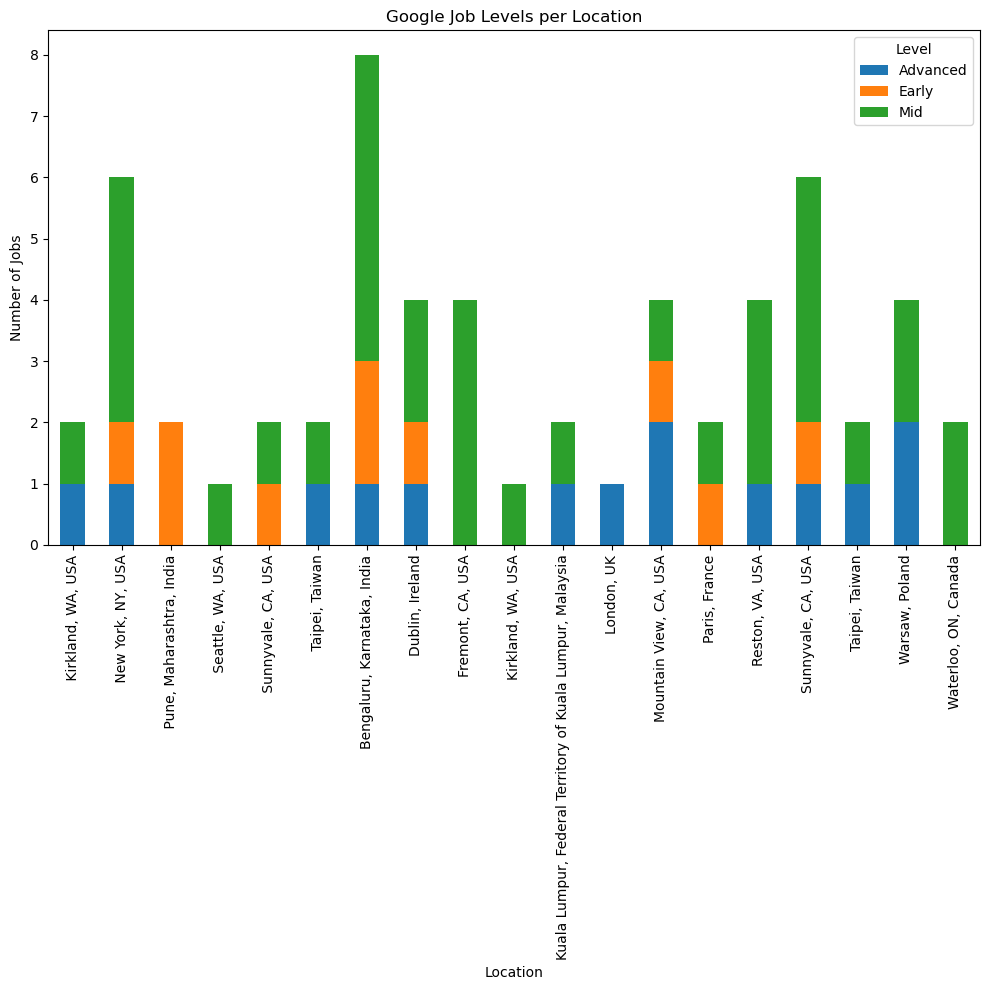

In [125]:
# Group by Location and Level, and count occurrences
grouped = df_copy.groupby(['Location', 'Level']).size().reset_index(name='Count')
pivot_table = grouped.pivot(index='Location', columns='Level', values='Count').fillna(0)

# Plotting
plt.figure(figsize=(10, 10))
pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Google Job Levels per Location')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90)
plt.legend(title='Level')
plt.tight_layout()
plt.show()

## Data Exporting

The processed data is exported to both Excel and CSV formats. This allows analysts to perform further analysis using spreadsheet software or import the data into other analytical tools.

In [121]:
# File names
csv_file = 'google_jobs_data.csv'
excel_file = 'google_jobs_data.xlsx'

# Export to CSV
try:
    df_copy.to_csv(csv_file, index=False)
    print(f"Data exported to {csv_file}")
except PermissionError as e:
    print(f"Permission error while writing to {csv_file}: {e}")

# Export to Excel
try:
    df_copy.to_excel(excel_file, index=False, sheet_name='Google Jobs Data')
    print(f"Data exported to {excel_file}")
except PermissionError as e:
    print(f"Permission error while writing to {excel_file}: {e}")

Data exported to google_jobs_data.csv
Data exported to google_jobs_data.xlsx
